In [5]:
# 미국 신생아 이름
import pandas as pd

names = ['name', 'sex', 'births']
names2024 = pd.read_csv('babynames/yob2024.txt', names=names)
names2024.groupby('sex')['births'].sum()

sex
F    1613188
M    1715313
Name: births, dtype: int64

In [6]:
pieces = []
for year in range(1880, 2025):
    path = f'babynames/yob{year}.txt'
    frame = pd.read_csv(path, names=['name','sex','births'])
    
    frame['year'] = year
    pieces.append(frame)

# 위 names와 이름이 겹치니 조심하세요.
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2149472,Zylyn,M,5,2024
2149473,Zymiere,M,5,2024
2149474,Zypher,M,5,2024
2149475,Zyre,M,5,2024


C:\Users\hp\AppData\Local\Temp\ipykernel_17404\1623631474.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)


<Axes: xlabel='year'>

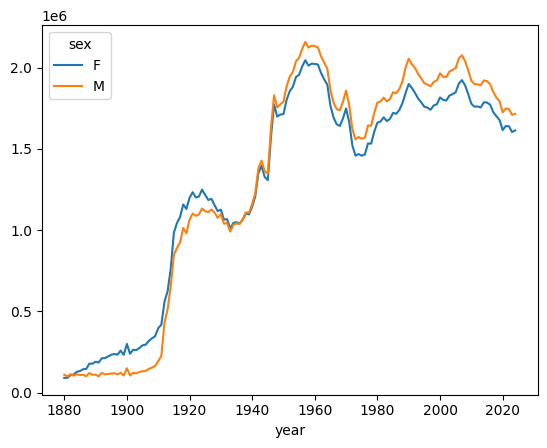

In [8]:
# 579
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
# total_births.tail()
total_births.plot()

In [13]:
# prop 열 추가, 전체 출생 수에서 차지하는 각 이름의 비율 계산하기 580p
def add_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

grouped = names.groupby(['year','sex'], group_keys=False).apply(add_prop)
grouped.groupby(['year', 'sex'])['prop'].sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_17404\1455078339.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = names.groupby(['year','sex'], group_keys=False).apply(add_prop)


year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2022  M      1.0
2023  F      1.0
      M      1.0
2024  F      1.0
      M      1.0
Name: prop, Length: 290, dtype: float64

In [15]:
# 581
# 각 연도별 가장 많은 이름
def get_top1000(group):
    return group.sort_values('births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000 = top1000.reset_index(drop=True)
top1000.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_17404\1979179954.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
